# Review Sentiment Analysis

### What we can do :
1. [-1.1]的感情评分进行[1,5]的归一化
2. 评论情感评分的总分布
3. category内的情感评分分布
4. overall和情感分析的correlation关系
5. 与overall进行比较查看是否有虚高（评分和overall的差值）
6. 对虚高进行分析
7. group by each product 进行overall mean和评分mean
8. 对于单一的产品的评分进行虚高分析
9. group by category 以情感评分为指标寻找最受欢迎的子类
10. 使用情感评分作为popular的指标，筛选出最popular和最不popular的top10产品
11. 时间变化的受欢迎程度分析

In [24]:
# Math Packages
import math
import pandas as pd
import numpy as np

# Plot Packages 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import warnings; warnings.simplefilter('ignore')

In [33]:
#NLP libraries
import spacy

In [7]:
DATA_FOLDER = "./data/"
META_HEALTH_CARE = "health_metadata.pkl"
REVIEWS_HEALTH_CARE = "health_review.pkl"
HEALTH_CARE = "health_merge.pkl"
PRODUCT_REVIEW_INFO = "product_review_info.pkl"

## Sentiment Analysis and Normalization

In [31]:
# Read product information in Health care including reviews
df_health_care = pd.read_pickle(DATA_FOLDER+ HEALTH_CARE)

df_product_review = df_health_care[["asin","title","reviewText","ReviewTime","categories","overall"]]

analyzer = SentimentIntensityAnalyzer()
df_product_review['reviewScore'] = df_product_review['reviewText'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df_product_review['reviewScoreNorm'] = df_product_review[['reviewScore']] * 2 + 3

df_product_review.head()

,asin,title,reviewText,ReviewTime,categories,reviewScore,overall,reviewScoreNorm
0,0077614992,Principles of Mgmt + Oper-CSUF Custom C,This book was a requirement for a college clas...,2013-02-15,[[Health & Personal Care]],0.2263,5,3.4526
1,0615208479,Brain Fitness Exercises Software,This is a great gift for anyone who wants to h...,2008-12-01,"[[Health & Personal Care, Personal Care]]",0.9748,5,4.9496
2,0615269990,Occam's Razor,Very helpful in learning about different disea...,2014-04-06,"[[Health & Personal Care, Personal Care, Shavi...",0.8313,5,4.6626
3,0615269990,Occam's Razor,Occam's Razor is an unbelievably intuitive and...,2013-12-04,"[[Health & Personal Care, Personal Care, Shavi...",0.9984,5,4.9968
4,0615269990,Occam's Razor,I met the guys from Nerdcore at a medical conf...,2014-04-24,"[[Health & Personal Care, Personal Care, Shavi...",0.4664,2,3.9328


In [32]:
# save as pickle
df_product_review.to_pickle(DATA_FOLDER + PRODUCT_REVIEW_INFO)

## Sentiment Distribution Analysis

In [ ]:
# read from pickle
df_product_review = pd.read_pickle(DATA_FOLDER + PRODUCT_REVIEW_INFO)

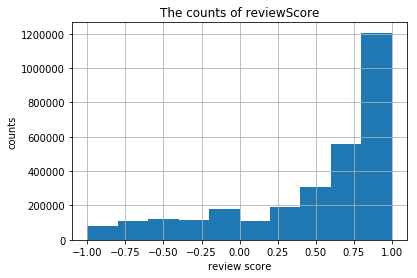

In [49]:
# plot distribution
df_product_review["reviewScore"].hist(bins=10)
plt.xlabel("review score")
plt.ylabel("counts")
plt.title("The counts of reviewScore")
plt.show()

In [48]:
pos_num = len(df_product_review[df_product_review["reviewScore"]>=0.05])
neu_num = len(df_product_review[(df_product_review["reviewScore"]>-0.05) & (df_product_review["reviewScore"]<0.05)])
neg_num = len(df_product_review[df_product_review["reviewScore"]<=-0.05])
total_num = len(df_product_review)

print("The number of positive reviews is :{pn} and occupies {p:.3f}% in the review".format(pn=pos_num,p=pos_num/total_num))
print("The number of neutral reviews is :{nu} and occupies {p:.3f}% in the review".format(nu=neu_num,p=neu_num/total_num))
print("The number of negative reviews is :{nu}and occupies {p:.3f}% in the review".format(nu=neg_num,p=neg_num/total_num))

The number of positive reviews is :2353432 and occupies 0.792% in the review
The number of neutral reviews is :124861 and occupies 0.042% in the review
The number of negative reviews is :494893and occupies 0.166% in the review


In [51]:
df_product_review.loc[df_product_review["reviewScore"]>=0.05,"label"]="positive"
df_product_review.loc[(df_product_review["reviewScore"]>-0.05) & (df_product_review["reviewScore"]<0.05),"label"]="neutral"
df_product_review.loc[df_product_review["reviewScore"]<=-0.05,"label"]="negative"

In [53]:
df_product_review.head()

,asin,title,reviewText,ReviewTime,categories,reviewScore,overall,reviewScoreNorm,label
0,0077614992,Principles of Mgmt + Oper-CSUF Custom C,This book was a requirement for a college clas...,2013-02-15,[[Health & Personal Care]],0.2263,5,3.4526,positive
1,0615208479,Brain Fitness Exercises Software,This is a great gift for anyone who wants to h...,2008-12-01,"[[Health & Personal Care, Personal Care]]",0.9748,5,4.9496,positive
2,0615269990,Occam's Razor,Very helpful in learning about different disea...,2014-04-06,"[[Health & Personal Care, Personal Care, Shavi...",0.8313,5,4.6626,positive
3,0615269990,Occam's Razor,Occam's Razor is an unbelievably intuitive and...,2013-12-04,"[[Health & Personal Care, Personal Care, Shavi...",0.9984,5,4.9968,positive
4,0615269990,Occam's Razor,I met the guys from Nerdcore at a medical conf...,2014-04-24,"[[Health & Personal Care, Personal Care, Shavi...",0.4664,2,3.9328,positive


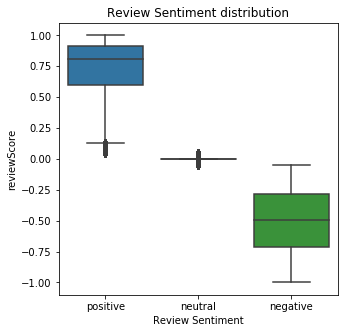

In [57]:
plt.figure(figsize=(5,5))
sns.boxplot(x="label", y="reviewScore", data=df_product_review,order=["positive", "neutral","negative"])
plt.xlabel("Review Sentiment")
plt.title("Review Sentiment distribution")
plt.show()

In [60]:
df_product_review[["reviewScore"]].describe()

,reviewScore
count,2.973186e+06
mean,4.938181e-01
std,5.216410e-01
min,-9.999000e-01
25%,2.382000e-01
50%,7.156000e-01
75%,8.910000e-01
max,1.000000e+00


In [62]:
df_product_review.loc[df_product_review["reviewScore"]>=0.05,"reviewScore"].describe()

count    2.353432e+06
mean     7.287716e-01
std      2.335450e-01
min      5.000000e-02
25%      5.994000e-01
50%      8.070000e-01
75%      9.141000e-01
max      1.000000e+00
Name: reviewScore, dtype: float64

In [63]:
df_product_review.loc[(df_product_review["reviewScore"]>-0.05) & (df_product_review["reviewScore"]<0.05),"reviewScore"].describe()

count    124861.000000
mean          0.000436
std           0.015195
min          -0.049900
25%           0.000000
50%           0.000000
75%           0.000000
max           0.049900
Name: reviewScore, dtype: float64

In [64]:
df_product_review.loc[df_product_review["reviewScore"]<=-0.05,"reviewScore"].describe()

count    494893.000000
mean         -0.499008
std           0.256299
min          -0.999900
25%          -0.713000
50%          -0.493900
75%          -0.286900
max          -0.050000
Name: reviewScore, dtype: float64

## Rating VS ReviewScore

In [67]:
df_product_review["Diff"] = abs(df_product_review["overall"] - df_product_review["reviewScoreNorm"])
df_product_review.head()

,asin,title,reviewText,ReviewTime,categories,reviewScore,overall,reviewScoreNorm,label,Diff
0,0077614992,Principles of Mgmt + Oper-CSUF Custom C,This book was a requirement for a college clas...,2013-02-15,[[Health & Personal Care]],0.2263,5,3.4526,positive,1.5474
1,0615208479,Brain Fitness Exercises Software,This is a great gift for anyone who wants to h...,2008-12-01,"[[Health & Personal Care, Personal Care]]",0.9748,5,4.9496,positive,0.0504
2,0615269990,Occam's Razor,Very helpful in learning about different disea...,2014-04-06,"[[Health & Personal Care, Personal Care, Shavi...",0.8313,5,4.6626,positive,0.3374
3,0615269990,Occam's Razor,Occam's Razor is an unbelievably intuitive and...,2013-12-04,"[[Health & Personal Care, Personal Care, Shavi...",0.9984,5,4.9968,positive,0.0032
4,0615269990,Occam's Razor,I met the guys from Nerdcore at a medical conf...,2014-04-24,"[[Health & Personal Care, Personal Care, Shavi...",0.4664,2,3.9328,positive,1.9328


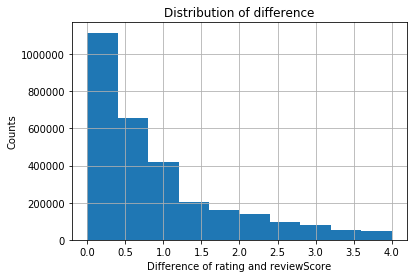

In [69]:
df_product_review["Diff"].hist(bins=10)
plt.xlabel("Difference of rating and reviewScore")
plt.ylabel("Counts")
plt.title("Distribution of difference")
plt.show()

In [70]:
# set threshold representing that the reviewScore is consistent with the rating, otherwise it's not.
# and the number of inconsistence and consistence
threshold = 1.0
diff_g1 = df_product_review[df_product_review["Diff"]>threshold]
diff_s1 = df_product_review[df_product_review["Diff"]<=threshold]